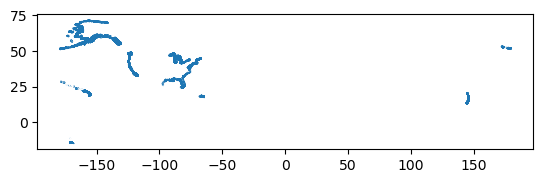

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import mapping, MultiLineString, LineString
from shapely.geometry import box
import pandas as pd

# Load the shapefile
shapefile_path = "C:/Users/ngodin/Dropbox/RESEARCH/active_projects/florida_condo/data/coastline/tl_2019_us_coastline/tl_2019_us_coastline.shp"
coastline_gdf = gpd.read_file(shapefile_path)

# Plot the coastline to visually inspect it
coastline_gdf.plot()
plt.show()


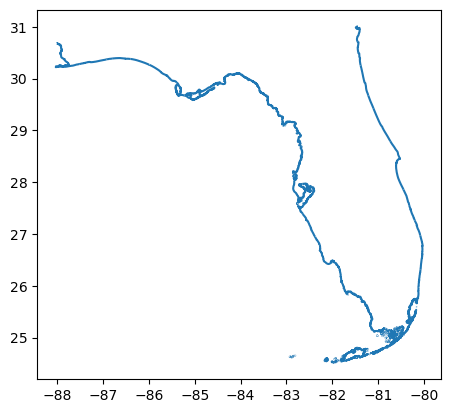

In [34]:
# Define the bounding box for Florida (approximate)
florida_bbox = box(-87.634938, 24.396308, -79.974307, 31.000968)

# Filter the coastline within the bounding box
florida_coastline = coastline_gdf[coastline_gdf.intersects(florida_bbox)]

# Plot the filtered coastline to verify
florida_coastline.plot()
plt.show()


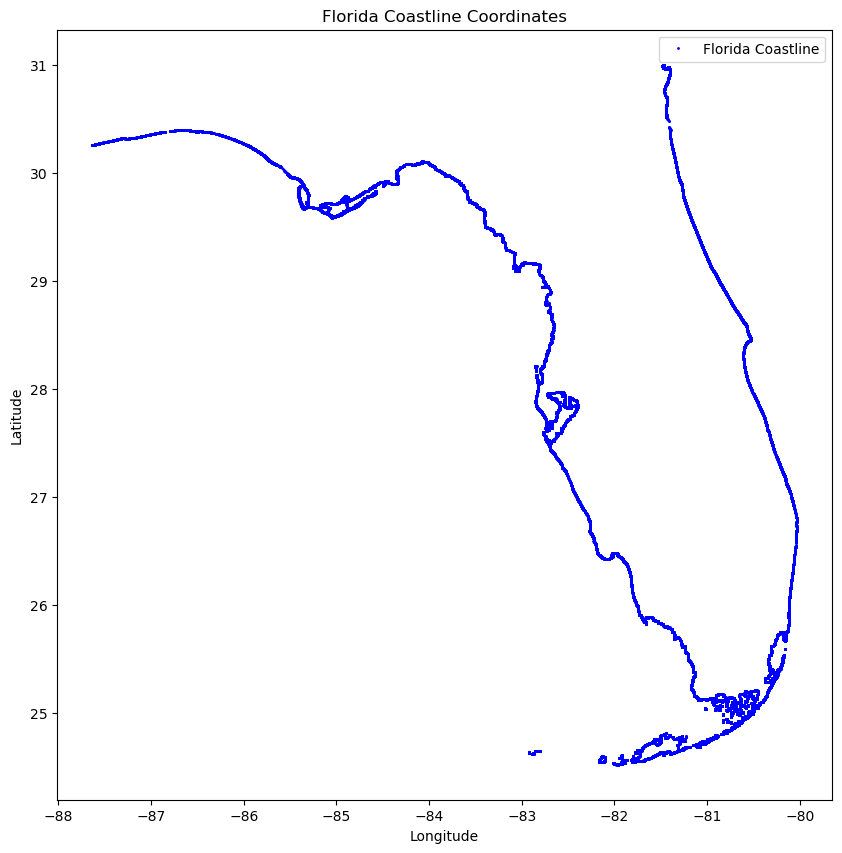

In [36]:
from shapely.geometry import mapping

# Function to extract coordinates from geometries
def extract_coordinates(geometry):
    if geometry.geom_type == "MultiLineString":
        return [coord for line in geometry for coord in line.coords]
    elif geometry.geom_type == "LineString":
        return list(geometry.coords)
    else:
        return []

# Extract coordinates for the Florida coastline
coordinates = []
for geom in florida_coastline.geometry:
    extracted_coords = extract_coordinates(geom)
    if extracted_coords:
        coordinates.extend(extracted_coords)
    else:
        print(f"Skipping geometry: {geom}")

# Round coordinates to 6 decimal places and ensure they are tuples
rounded_coordinates = [(round(coord[0], 6), round(coord[1], 6)) for coord in coordinates if isinstance(coord, tuple)]

# Filter coordinates to ensure they fall within the Florida bounding box
filtered_coordinates = [
    coord for coord in rounded_coordinates
    if (florida_bbox.bounds[0] <= coord[0] <= florida_bbox.bounds[2]) and
       (florida_bbox.bounds[1] <= coord[1] <= florida_bbox.bounds[3])
]

# Convert to a DataFrame
df = pd.DataFrame(filtered_coordinates, columns=['Longitude', 'Latitude'])

# Export to CSV
csv_path = "C:/Users/ngodin/Dropbox/RESEARCH/active_projects/florida_condo/data/coastline/fl_coastline_coordinates.csv"
df.to_csv(csv_path, index=False)

#print(f"Coordinates have been exported to {csv_path}")

# Plot the filtered coordinates
plt.figure(figsize=(10, 10))
plt.plot(df['Longitude'], df['Latitude'], 'o', markersize=1, color='blue', label='Florida Coastline')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Florida Coastline Coordinates')
plt.legend()
plt.show()